<a href="https://colab.research.google.com/github/NinaAbeyratne/Snaky---Snake-Identification-System/blob/Nina/transform_and_augment_small_set_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Number of augmented images saved: 76


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DSGP Group 24/Dataset/augmented_images_test_set/augmented_4_texas_ratsnake_in_grass_1-2-15.jpg'

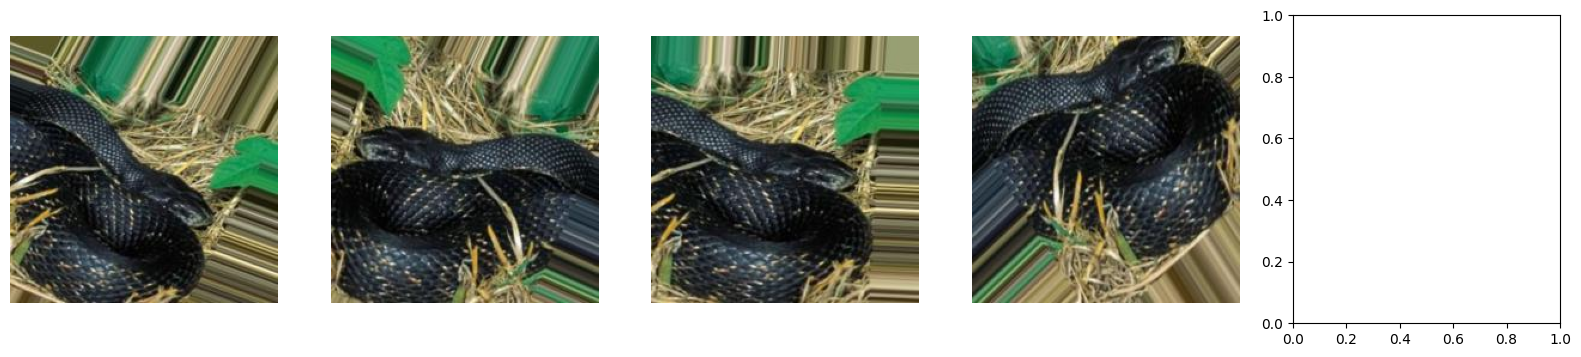

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
from google.colab import drive
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive
drive.mount("/content/drive", force_remount=True)

# Set the path to your dataset
dataset_path = "/content/drive/MyDrive/DSGP Group 24/Dataset/dataset - Nina/test set/"

# Create a directory to save augmented images
augmented_path = "/content/drive/MyDrive/DSGP Group 24/Dataset/augmented_images_test_set"
os.makedirs(augmented_path, exist_ok=True)

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define data augmentation generator
data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to augment images and save
def augment_and_save(image_path):
    img = Image.open(image_path)

    # Check if the image has an alpha channel (4 channels)
    if img.mode == 'RGBA':
        img = img.convert('RGB')  # Convert RGBA to RGB

    img_tensor = transform(img)  # Apply transformations

    # Save original image
    save_image(img_tensor, os.path.join(augmented_path, f"original_{os.path.basename(image_path)}"))

    # Convert the image to a NumPy array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in data_generator.flow(x, batch_size=1):
        augmented_img = Image.fromarray(batch[0].astype('uint8'))
        augmented_img_tensor = transform(augmented_img)  # Apply transformations
        save_image(augmented_img_tensor, os.path.join(augmented_path, f"augmented_{i}_{os.path.basename(image_path)}"))
        i += 1
        if i % 4 == 0:
            break

# Iterate through images in the dataset path
for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(dataset_path, filename)
        augment_and_save(image_path)

# Count the number of augmented images saved
num_augmented_images = len([filename for filename in os.listdir(augmented_path) if filename.startswith("augmented_")])
print("Number of augmented images saved:", num_augmented_images)

# Plot a sample of augmented images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    img = plt.imread(os.path.join(augmented_path, f"augmented_{i}_{os.path.basename(image_path)}"))
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()
